In [12]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Connect to the database and load cleaned data
path = os.path.join('..', 'Database', 'news.db')
conn = sqlite3.connect(path)
df = pd.read_sql("SELECT * FROM cleanedText", conn)
conn.close()

In [4]:
# Display dataset info
print("Dataset Shape:", df.shape)

Dataset Shape: (44898, 3)


In [5]:
df.head()  # Show first 5 rows

,id,cleaned_text,label
0,1,washington reuters head conservative republica...,real
1,2,washington reuters transgender people allowed ...,real
2,3,washington reuters special counsel investigati...,real
3,4,washington reuters trump campaign adviser geor...,real
4,5,seattlewashington reuters president donald tru...,real


In [6]:
df.info() # Data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            44898 non-null  int64 
 1   cleaned_text  44898 non-null  object
 2   label         44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
# Compute word count for cleaned articles
df["word_count"] = df["cleaned_text"].apply(lambda x: len(str(x).split())) 

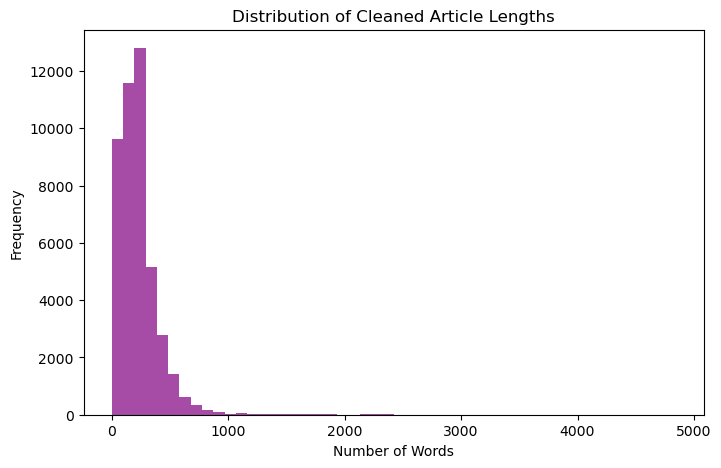

In [10]:
# Plot histogram of word counts
plt.figure(figsize=(8,5))
plt.hist(df["word_count"], bins=50, color="purple", alpha=0.7)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Cleaned Article Lengths")
plt.show()

In [11]:
# Display basic statistics
print(df["word_count"].describe())

count    44898.000000
mean       228.746603
std        199.219490
min          0.000000
25%        115.000000
50%        201.000000
75%        286.000000
max       4841.000000
Name: word_count, dtype: float64


In [24]:
def get_top_words(text_list, num_words):
    words = []
    for text in text_list:
        words.extend(str(text).split())  # Split each cleaned article into words
    
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

In [23]:
# Get top words for the entire dataset
top_words = get_top_words(df["cleaned_text"], num_words=25)

# Display results
print("Top 25 Most Frequent Words:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 25 Most Frequent Words:
said: 130052
trump: 128617
u: 63523
state: 58393
would: 54947
president: 53163
people: 41381
republican: 38143
one: 36806
year: 34481
also: 31194
new: 30944
reuters: 28769
government: 28524
clinton: 28167
donald: 27660
house: 27658
time: 26870
say: 25386
obama: 24874
country: 24832
could: 23899
united: 23540
told: 23344
election: 23180


In [20]:
# Get top words separately for fake and real news
fake_words = get_top_words(df[df["label"] == "fake"]["cleaned_text"], 20)
real_words = get_top_words(df[df["label"] == "real"]["cleaned_text"], 20)

In [21]:
print("\nTop Words in Fake News:")
for word, count in fake_words:
    print(f"{word}: {count}")


Top Words in Fake News:
trump: 74264
said: 31013
president: 26166
people: 26053
one: 23752
would: 23427
u: 22353
state: 21997
clinton: 18649
like: 18164
obama: 17813
time: 17745
donald: 17215
republican: 16034
american: 16026
say: 15442
also: 15242
year: 15201
new: 14158
news: 14126


In [22]:
print("\nTop Words in Real News:")
for word, count in real_words:
    print(f"{word}: {count}")


Top Words in Real News:
said: 99039
trump: 54353
u: 41170
state: 36396
would: 31520
reuters: 28404
president: 26997
republican: 22109
government: 19466
year: 19280
house: 16935
new: 16786
also: 15952
united: 15572
people: 15328
party: 14990
official: 14580
told: 14244
country: 14106
election: 13959
